Q3: How do training Epochs and batch size affect neural network performance?

This question looks into how training parameters (Epochs and batch size) affect the performance of a neural network when predicting spotify track popularity.

This builds directly on the neural network used in Q2.

Neural networks are trained iteratively using gradient based optimisation. two important hyperparameters that influence training behaviour are:

- Epochs: the number of times the model sees the full training dataset.
- Batch size: the number of samples used per gradient update.

These two parameters affect generlisation, convergence speed, and an overall risk of over/underfitting. Understanding their effect on a neural network is essential when deploying one in real world systems such as music recommendation platforms.

This spotify dataset contains metadata about tracks and their respective artists. The task  is framed as a binary classification problem:
predicting whether a track is popular.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [35]:
df = pd.read_csv("track_data_final.csv")
df["popular"] = (df["track_popularity"] >=70).astype(int)
df = df.drop(columns=["track_id","album_id","track_name","album_name","artist_name","track_popularity"])

Featured Engineering and Encoding:

categorical variables are encoded numerically using label encoding, this reduces dimensionality and allows the neural network to leanr relationships between encoded categories.

In [36]:

df["artist_popularity_log"] = np.log1p(df["artist_popularity"])
df = df.drop(columns=["artist_popularity"])

label_encoders = {}

categorical_cols = ["album_type", "explicit", "track_genre"]

for col in df.select_dtypes(include="object").columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

Data Splitting and Scaling:

Numerical scaling is applied to all features to ensure stable, gradient based training.

In [39]:
X = df.drop(columns=["popular"])
Y = df["popular"]
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=42,stratify=Y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Neural Network Architecture:

A fully connected neural network is used, matching the architecture introduced in Q2.

In [45]:
def build_model(input_dim):
  model = Sequential([Dense(64, activation="relu", input_shape=(X_train_scaled.shape[1],)),Dense(32, activation="relu"),Dense(1)])
  model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
  return model

Experiment 1: effect of epochs

batch size is fixed at 32 while the number of epochs is varied.

In [56]:
epoch_values = [1,5,10,20,40]
epoch_accuracies = []

for epochs in epoch_values:
  model = build_model(X_train_scaled.shape[1])
  model.fit(X_train_scaled,Y_train,epochs=epochs,batch_size=32,validation_split=0.2, verbose=0)
  loss, acc = model.evaluate(X_test_scaled,Y_test, verbose=0)
  epoch_accuracies.append(acc)

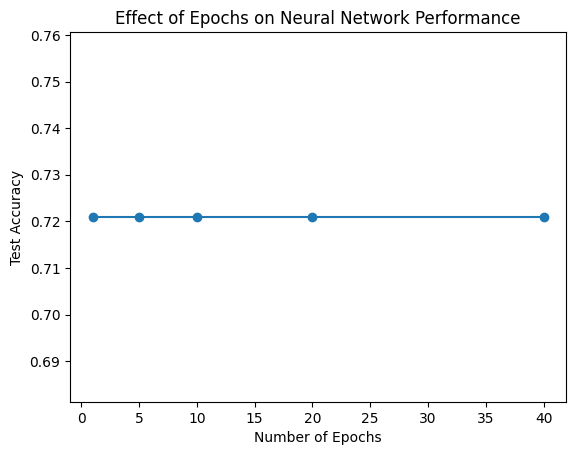

In [57]:
plt.figure()
plt.plot(epoch_values, epoch_accuracies, marker="o")
plt.xlabel("Number of Epochs")
plt.ylabel("Test Accuracy")
plt.title("Effect of Epochs on Neural Network Performance")
plt.show()

Experiment 2: Effect of Batch size.

The number of epochs is fixed at 20 while batch size is varied.

In [59]:
batch_sizes = [16, 32, 64]
batch_accuracies = []

for batch_size in batch_sizes:
    model = build_model(X_train_scaled.shape[1])
    model.fit(X_train_scaled,Y_train,epochs=20,batch_size=batch_size,validation_split=0.2,verbose=0)
    loss, acc = model.evaluate(X_test_scaled, Y_test, verbose=0)
    batch_accuracies.append(acc)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


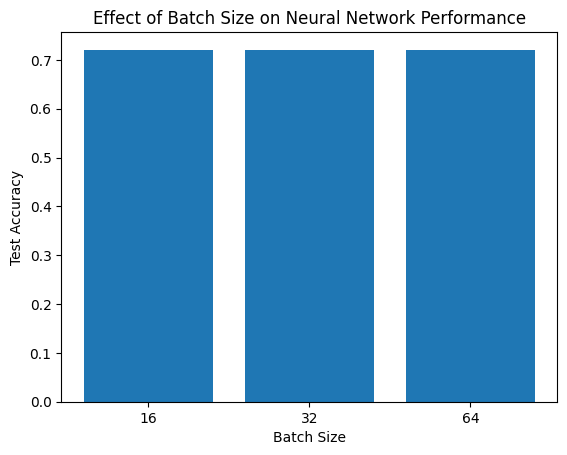

In [60]:
plt.figure()
plt.bar([str(b) for b in batch_sizes], batch_accuracies)
plt.xlabel("Batch Size")
plt.ylabel("Test Accuracy")
plt.title("Effect of Batch Size on Neural Network Performance")
plt.show()

Results:

The neural network achieved very similar test accuracy across all test epoch counts and batch sizes. The changes in epoch had a miniscule improvement, and the varied batch size had no observable effects on the test accuracy.

This then indicates that the model converged early and reached a stable solution early in its training.

Interpretation:

The lack of variation in performance suggests that the classification task is
relatively easy for the chosen neural network architecture. The model converges
rapidly, likely within the first few epochs, and reaches a stable optimum that
is robust to changes in batch size.

This behaviour is consistent with training a small neural network on a
low-dimensional, well-conditioned tabular dataset using the Adam optimiser.
Once convergence is reached, additional epochs or different batch sizes do not
lead to further improvements in generalisation.


Conclusion:

For the Spotify popularity classification task, training hyperparameters such as
the number of epochs and batch size had minimal impact on final model performance.
The neural network consistently reached similar levels of test accuracy regardless
of these choices.

This suggests that, for relatively simple tabular classification problems, model
architecture and feature quality may be more influential than fine-grained tuning
of training parameters.
